<a href="https://colab.research.google.com/github/adolfmukama/MachineLearning4Genomics/blob/main/NLP_DSA_8501_PROJECT_(copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading libraries for scraping twitter data
import pandas as pd
# import snscrape.modules.twitter as sntwitter
import itertools
import re
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pwd


/content


In [6]:
df=pd.read_csv('tweets.csv',index_col=0)

In [7]:
#reset author to a column
df = df.reset_index()

In [8]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [9]:
df.shape

(52542, 10)

In [10]:
#displaying the last 5 tweets from the data
df.tail()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
52537,ddlovato,Life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456
52541,ddlovato,❤️❄️✈️ http://t.co/ixmB5lv17Z,NaN,05/01/2015 00:02,5.518910e+17,und,NaN,NaN,16193,10822


In [ ]:
#inspecting a single row of the text column
df['content'][1:4]

1    @barackobama Thank you for your incredible gra...
2                  Life goals. https://t.co/XIn1qKMKQl
3              Me right now 🙏🏻 https://t.co/gW55C1wrwd
Name: content, dtype: object

In [14]:
#selecting columns of interest only
text_data=df[['author','content','date_time','number_of_shares']]

In [13]:
text_data.head()

,content,date_time,number_of_shares
0,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472
1,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380
2,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387
3,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458
4,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655


## Text Cleaning

In [15]:
# removing duplicates from the text column
text_data.drop_duplicates('content',keep='first')

,author,content,date_time,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655
...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,06/01/2015 23:10,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,06/01/2015 02:17,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",05/01/2015 03:42,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,05/01/2015 00:06,10456


In [16]:
text_data.shape

(52542, 4)

In [18]:
#remove username and links
#def clean_text(text):
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    #text = url_pattern.sub(r'', text)
    #return text.strip()
#remove username and links,hashtags and extra spaces
def clean_text(text):
    #remove links
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    #remove usernames
    username_pattern = re.compile(r'@\w+')
    text = username_pattern.sub(r'', text)
    # Remove hashtags
    hashtag_pattern = re.compile(r'#\w+')
    text = hashtag_pattern.sub(r'', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [20]:
text_data['Processed_Tweets'] =text_data['content'].apply(clean_text)
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself...?
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals.
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now 🙏🏻
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️


In [ ]:
#remove links and urls
# def remove_usernames_links(content):
#     content=re.sub('http[^\s]+','',content)
#     return content


# text_data['Processed_Tweets'] =text_data['content'].apply(remove_usernames_links)
# text_data.head()

In [21]:
text_data['Processed_Tweets'][0:4]

0                      Is history repeating itself...?
1    Thank you for your incredible grace in leaders...
2                                          Life goals.
3                                      Me right now 🙏🏻
Name: Processed_Tweets, dtype: object

In [22]:
# remove punctuation from the text column
import string
import html
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def remove_punctuation(content):
    no_punct=[words for words in content if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(lambda x: remove_punctuation(x))
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now 🙏🏻
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️


In [24]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                      Me right now 🙏🏻
4            SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️
5    happy 96th gma  🎈  LACMA Los Angeles County Mu...
6                                   Kyoto Japan 1 5 17
7                                  🇯🇵  Sanrio Puroland
8               2017 resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [26]:
# remove numbers
def remove_numbers(Processed_Tweets):
    Processed_Tweets=re.sub(r'\d','',Processed_Tweets)
    return Processed_Tweets
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(lambda x: remove_numbers(x))
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now 🙏🏻
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️


In [27]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                      Me right now 🙏🏻
4            SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️
5    happy th gma  🎈  LACMA Los Angeles County Muse...
6                                       Kyoto Japan   
7                                  🇯🇵  Sanrio Puroland
8                    resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [28]:
for i in range (len(text_data['Processed_Tweets'])):

    x = text_data['Processed_Tweets'][i].replace("\n"," ").replace("\r"," ") #cleaning newline “\n” from the tweets
    text_data['Processed_Tweets'][i] = html.unescape(x)

In [29]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                      Me right now 🙏🏻
4            SISTERS ARE DOIN IT FOR THEMSELVES 🙌🏻💪🏻❤️
5    happy th gma  🎈  LACMA Los Angeles County Muse...
6                                       Kyoto Japan   
7                                  🇯🇵  Sanrio Puroland
8                    resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [30]:
#remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii','ignore').decode('ascii')
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(lambda s:deEmojify(s))
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,Is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,Thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,Life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,Me right now
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,SISTERS ARE DOIN IT FOR THEMSELVES


In [31]:
text_data['Processed_Tweets'][0:10]

0                          Is history repeating itself
1    Thank you for your incredible grace in leaders...
2                                           Life goals
3                                        Me right now 
4                  SISTERS ARE DOIN IT FOR THEMSELVES 
5    happy th gma    LACMA Los Angeles County Museu...
6                                       Kyoto Japan   
7                                      Sanrio Puroland
8                    resolution to embody authenticity
9                                              sisters
Name: Processed_Tweets, dtype: object

In [32]:
#convert cleaned text to lower case
text_data['Processed_Tweets']=text_data['Processed_Tweets'].str.lower()
text_data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,is history repeating itself
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,thank you for your incredible grace in leaders...
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,life goals
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,me right now
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,sisters are doin it for themselves


In [33]:
df2=text_data['Processed_Tweets']
df2.head()

0                          is history repeating itself
1    thank you for your incredible grace in leaders...
2                                           life goals
3                                        me right now 
4                  sisters are doin it for themselves 
Name: Processed_Tweets, dtype: object

In [ ]:
# df2.to_csv('ner_data.csv',index=False)

In [ ]:
# panda=pd.read_csv('ner_data.csv')
# panda=panda.dropna(how='all')

In [ ]:
# panda.tail()

In [34]:
# importing libraries for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer
import os
import string

from wordcloud import WordCloud, STOPWORDS
lemmatizer=WordNetLemmatizer()
# %matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
eng_stop_words=list(stopwords.words('english'))

In [35]:
def PreprocessedTweets(content):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the tweet
    tokens = word_tokenize(content)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstruct the tweet
    cleaned_tweet = ' '.join(tokens)
    return cleaned_tweet


In [51]:
text_data['Processed_Tweets']=text_data['Processed_Tweets'].apply(PreprocessedTweets)

In [52]:
text_data['Processed_Tweets'][0:10]

0                                   history repeating
1       thank incredible grace leadership exceptional
2                                           life goal
3                                               right
4                                         sister doin
5    happy th gma lacma los angeles county museum art
6                                         kyoto japan
7                                     sanrio puroland
8                      resolution embody authenticity
9                                              sister
Name: Processed_Tweets, dtype: object

## Analyzing Text statistics

<Axes: >

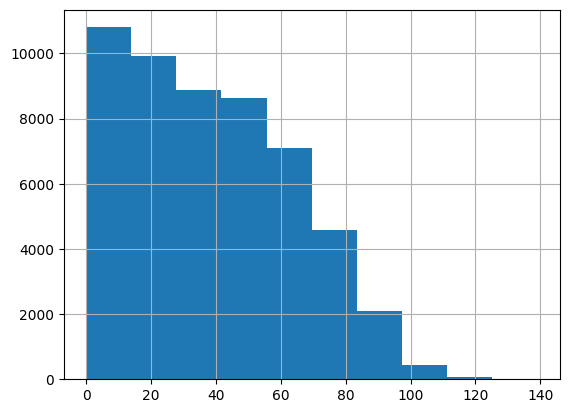

In [53]:
#number of characters present in each sentence
text_data['Processed_Tweets'].str.len().hist()

- We can see that for the preprocessed tweets, the number of characters range approximately between 0 to 140.
- Majority of the sentences have 10-80 words.

In [54]:
# number of words appearing in each processed tweets
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

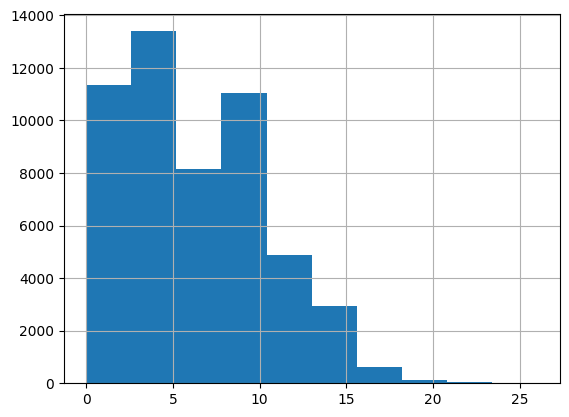

In [55]:
plot_word_number_histogram(text_data['Processed_Tweets'])

- Number of words appearing in the processed tweets range between 2 to 20 words

In [56]:
import numpy as np

In [57]:
# Analyzing the stop words removed from the original tweets
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

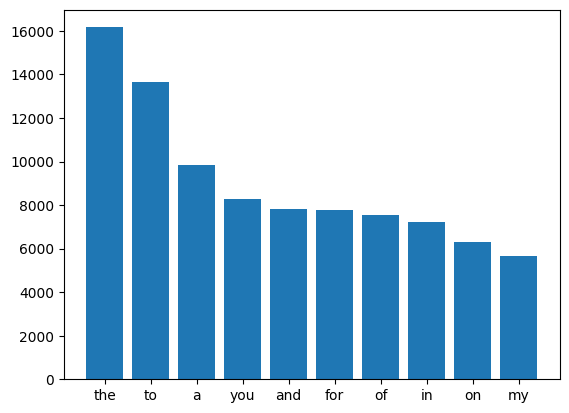

In [58]:
plot_top_stopwords_barchart(text_data['content'])

The most common stop word in the Text column was the, followed by to and a. The least in the top 10 common stop words is my.

In [59]:
#Top non stop words
import seaborn as sns
from collections import  Counter


In [60]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        #if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

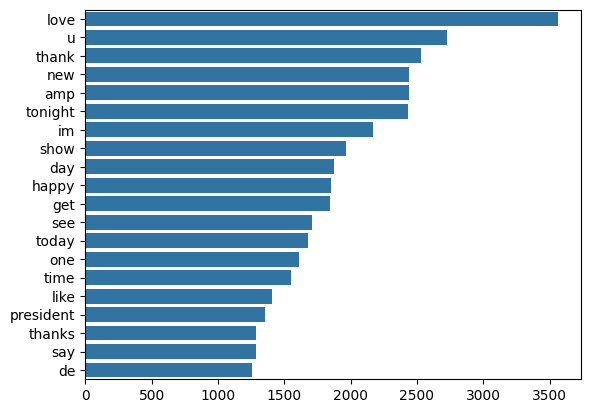

In [61]:
plot_top_non_stopwords_barchart(text_data['Processed_Tweets'])

- From the bar graph, we can see the top non-stopwords are love,u, thank and new.

## Ngram exploration

In [62]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
def plot_top_ngrams_barchart(text, n=2):
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

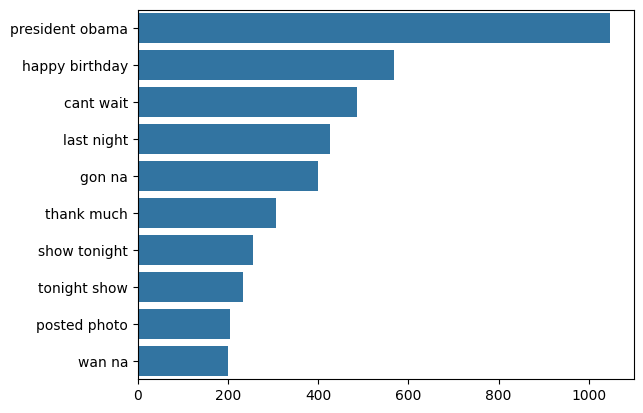

In [64]:
plot_top_ngrams_barchart(text_data['Processed_Tweets'],2)

- Bigrams such as president obama,happy birthday,cant wait,last night dominate the processed tweets

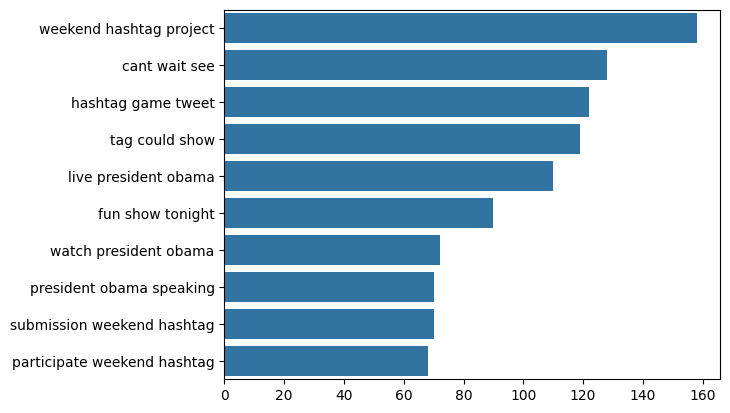

In [65]:
# top trigrams
plot_top_ngrams_barchart(text_data['Processed_Tweets'],3)

From the plot, weekend hashtag project, cant wait see, hashtag game tweet etc., dominate the trigrams of processed tweets

## Word Cloud

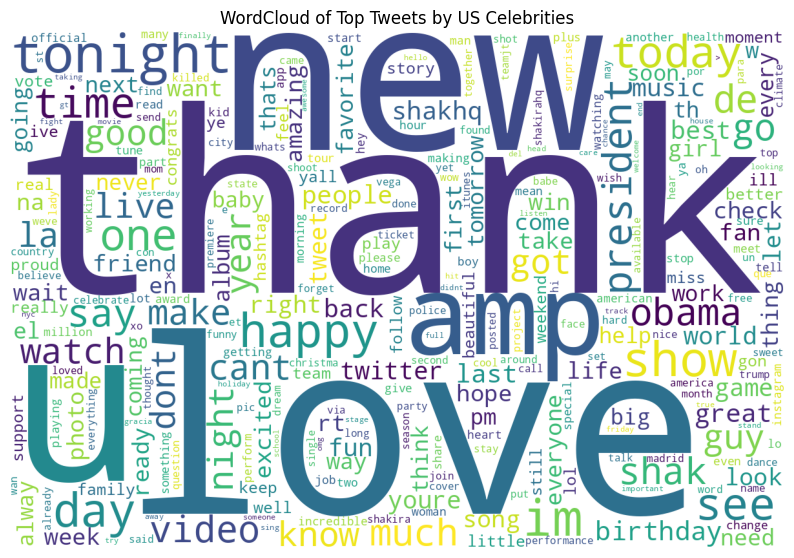

In [66]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=1200, height=800, background_color='white',
                        collocations=False).generate(" ".join(text_data['Processed_Tweets']))
plt.grid(None)
plt.title("WordCloud of Top Tweets by US Celebrities")
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud.png')

In [67]:
# save data into csv format
text_data.to_csv('usceleb_tweets.csv',index=False)

In [68]:
data=pd.read_csv('usceleb_tweets.csv')

In [69]:
data.head()

,author,content,date_time,number_of_shares,Processed_Tweets
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,3472,history repeating
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,1380,thank incredible grace leadership exceptional
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,2387,life goal
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,2458,right
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,4655,sister doin


In [70]:
#top 10 tweet locations
top_tweet_shares=data.number_of_shares.value_counts().sort_values(ascending=False).head(10)
top_tweet_shares

number_of_shares
5      77
2      68
172    67
6      65
4      63
149    62
3      61
8      60
10     58
164    56
Name: count, dtype: int64

In [71]:
top_username=data.author.value_counts().head(20)
top_username

author
TheEllenShow     3147
jimmyfallon      3123
ArianaGrande     3104
YouTube          3077
KimKardashian    2939
katyperry        2924
selenagomez      2913
rihanna          2877
BarackObama      2863
britneyspears    2776
instagram        2577
shakira          2530
Cristiano        2507
jtimberlake      2478
ladygaga         2329
Twitter          2290
ddlovato         2217
taylorswift13    2029
justinbieber     2000
cnnbrk           1842
Name: count, dtype: int64

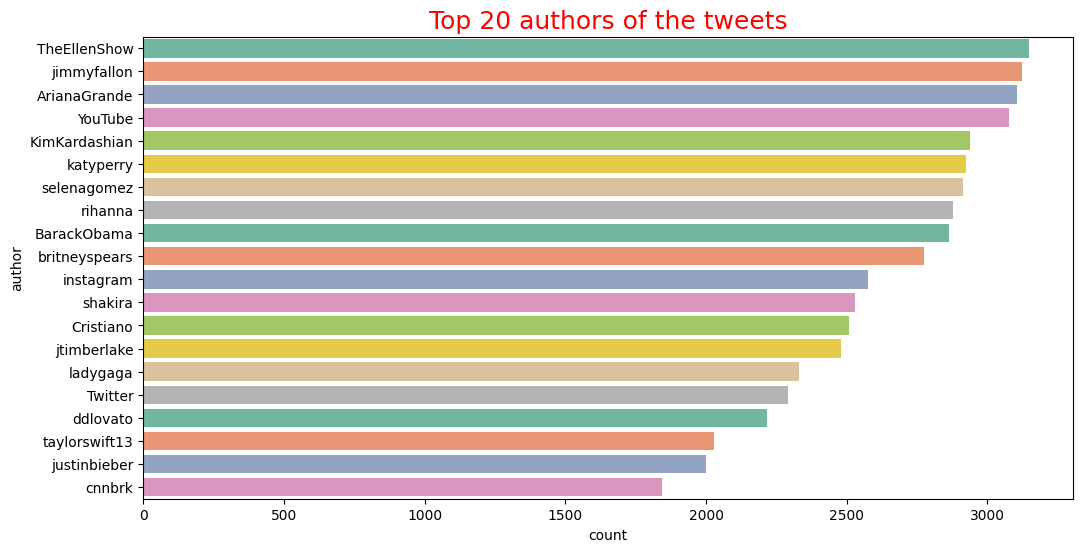

In [72]:
#visualizing the top tweeters from kenya
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Top 20 authors of the tweets",fontsize=18,color='Red')
sns.barplot(y=top_username.index,x=top_username,palette='Set2',orient='h')
plt.savefig('top_20_us.png')

## TOPIC MODELLING USING LATENT DIRCHLET ALLOCATION (LDA)

In [ ]:
import gensim
from gensim.utils import simple_preprocess
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'de', 'use','e','nm','tx','nz','u','im','i','I','th','gma'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data_n = data.Processed_Tweets.values.tolist()
data_words = list(sent_to_words(data_n))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
data_words[1]

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")


# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,
                              mds="mds",R=30)
vis

## SENTIMENT ANALYSIS

In [73]:
#!pip install better_profanity
#!pip install textblob

In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [76]:
list1 = []
for i in data['Processed_Tweets']:
    list1.append((sentiments.polarity_scores(str(i)))['compound'])

In [77]:
data['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

data['sentiment_category'] = data['sentiment'].apply(sentiment_category)

In [98]:
data.tail()
data['sentiment_category'][0:10]

,author,content,date_time,number_of_shares,Processed_Tweets,sentiment,sentiment_category
52537,ddlovato,Life couldn't be better right now. 😊,06/01/2015 23:10,23796,life couldnt better right,-0.3412,negative
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,06/01/2015 02:17,12511,first monday back action id say mile success,0.5719,positive
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",05/01/2015 03:42,15583,crime show buddy snuggle perfect sunday night,0.0516,positive
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,05/01/2015 00:06,10456,NaN,0.0000,neutral
52541,ddlovato,❤️❄️✈️ http://t.co/ixmB5lv17Z,05/01/2015 00:02,10822,NaN,0.0000,neutral


In [94]:
data['sentiment_category'].value_counts()

sentiment_category
positive    26381
neutral     20648
negative     5513
Name: count, dtype: int64

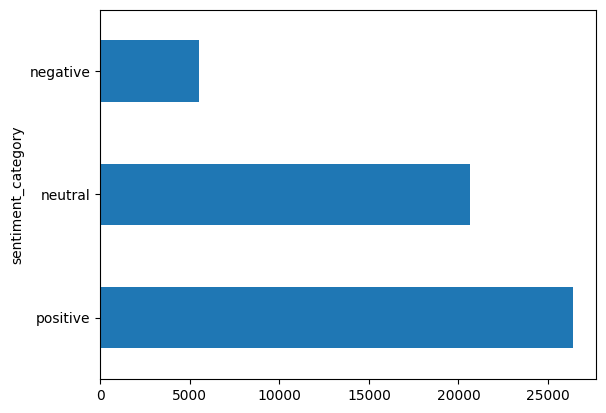

In [99]:
# visualizing the sentiments
data['sentiment_category'].value_counts().plot(kind='barh')
plt.savefig('sentiment.png')

In [100]:
#inspecting positively classified sentiments
data[data['sentiment_category']=='positive']['content'].head()

1     @barackobama Thank you for your incredible gra...
5     happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...
10    Happy Holidays! Sending love and light to ever...
12    When my whole fam tryna have a peaceful holida...
13    When your holiday shopping is woke af ❗️blkliv...
Name: content, dtype: object

In [101]:
# inspecting negatively classified sentiments
data[data['sentiment_category']=='negative']['content'].head()

11    Damn, it's hard to wrap presents when you're d...
14                @shannonwoodward Have you been hacked
33    . @realDonaldTrump how bout you start with an ...
38    Confused? Overwhelmed? Here's the brief you ne...
43    From Pastor John Pavlovitz "This is not about ...
Name: content, dtype: object

In [102]:
#inspecting neutrally classified sentiments
data[data['sentiment_category']=='neutral']['content'].head()

0    Is history repeating itself...?#DONTNORMALIZEH...
2                  Life goals. https://t.co/XIn1qKMKQl
3              Me right now 🙏🏻 https://t.co/gW55C1wrwd
4    SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...
6    Kyoto, Japan \r\n1. 5. 17. https://t.co/o28M0v...
Name: content, dtype: object

## Named Entity Recognition (NER)

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp=spacy.load("en_core_web_sm")
nlp.max_length = 1700000
#get the pipeline component
ner=nlp.get_pipe("ner")

In [ ]:
panda['Processed_Tweets'].iloc[1000]

In [ ]:
#sample tag text
txt=panda['Processed_Tweets'].iloc[1000]
doc=nlp(txt)

In [ ]:
def spacy_large_ner(document):

    return {(ent.text.strip(), ent.label_) for ent in nlp(document).ents}
spacy_large_ner(txt)

In [ ]:
## display result
spacy.displacy.render(doc,style='ent')

In [ ]:
#named_entity_bar_chart
def plot_named_entity_barchart(text):
    #nlp = spacy.load("en_core_web_sm")

    def _get_ner(text):
        doc=nlp(text)
        #return {(ent.text.strip(), ent.label_) for ent in nlp(text).ents}
        return [X.label_ for X in doc.ents]

    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()

    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

In [ ]:
plot_named_entity_barchart(data['Processed_Tweets'])

PERSON,GPE and ORG dominate the entity bar chart

In [ ]:
def plot_most_common_named_entity_barchart(text, entity=""):
    #nlp = spacy.load("en_core_web_sm")

    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]

    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

In [ ]:
plot_most_common_named_entity_barchart(data['Processed_Tweets'],entity='GPE')

In [ ]:
# creating tokens that will serve as entities for Spacy
tokens = nlp(''.join(str(panda['Processed_Tweets'].tolist())))

In [ ]:
# extracting the entities
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

In [ ]:
#extracting the location (GPE)
location_list=[]
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        location_list.append(ent.text)
location_counts = Counter(location_list).most_common()
df_location = pd.DataFrame(location_counts, columns =['country','count'])

In [ ]:
df_location.head(10)

In [ ]:
#df_location.plot.barh(x='country', y='count', title="NER for different locations", figsize=(10,8)).invert_yaxis()

In [ ]:
# Extracting longitudes and Latitudes
#df_location.to_csv('location.csv',index=False)

In [ ]:
df1=pd.read_csv('location.csv')

In [ ]:
df1.head()

In [ ]:
#!pip install geopy
#!pip install geopandas

In [ ]:
from geopandas.tools import geocode

In [ ]:
for index,row in df1.iterrows():
    try:
        print(row['country'])
        information=geocode(row['country'],provider='nominatim',user_agent='xyz',timeout=5)
        df1.loc[index,'longitude']=information.geometry.loc[0].x
        df1.loc[index,'latitude']=information.geometry.loc[0].y
    except TypeError:
        print('Coordinates of' +row['country']+'are not available')


In [ ]:
df1.head()

In [ ]:
#save the df1 to a new csv format
df1.to_csv('location_geo.csv',index=False)

In [ ]:
#df2=pd.read_csv('location_geo.csv')

## A world map showing location of fall armyworms from different tweets

In [ ]:

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df2 = pd.read_csv("location_geo.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
gdf = GeoDataFrame(df2, geometry=geometry)

#a world map with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 8)), marker='o', color='red', markersize=15);
plt.savefig('fallarmyworm_geomap.png')